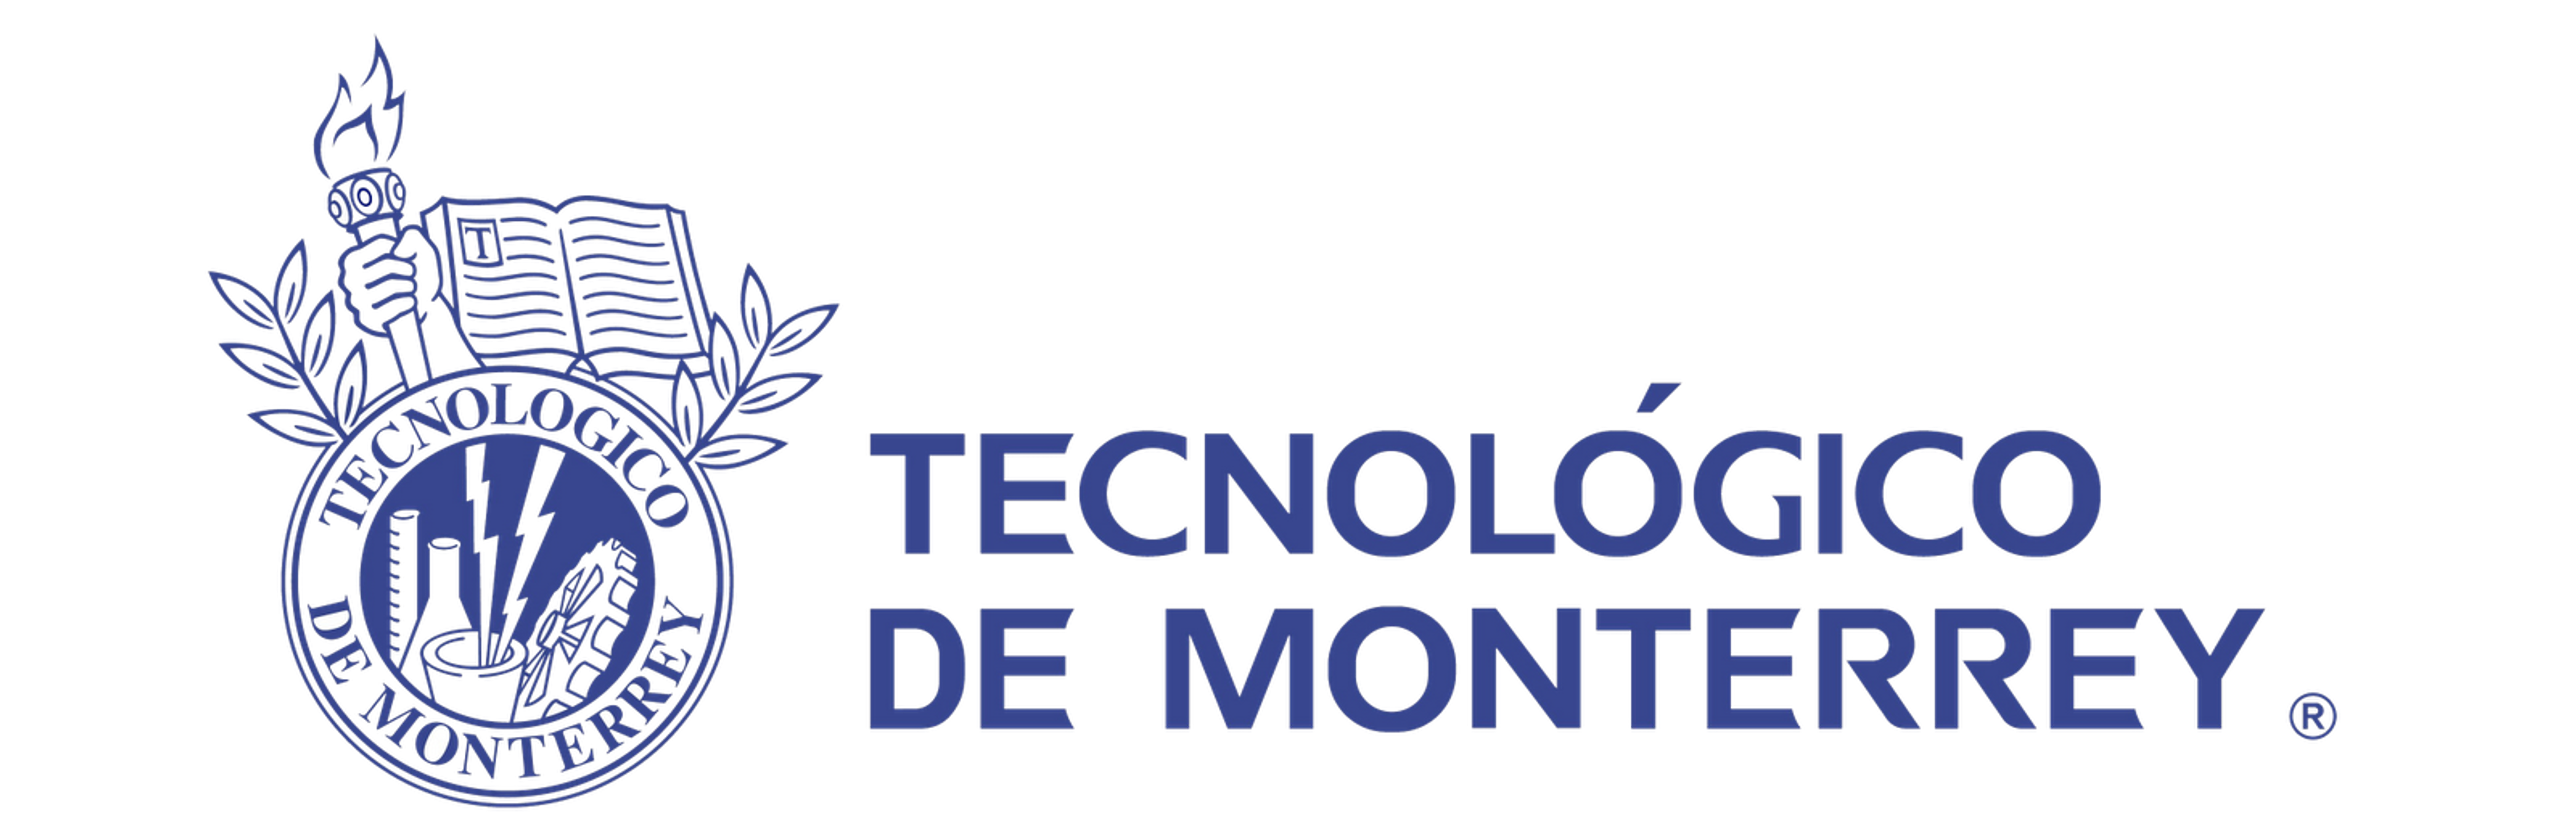

## TC5035 Proyecto integrador
### Tecnológico de Monterrey
#### Dra. Grettel Barceló Alonso
#### Dr. Luis Eduardo Falcón Morales

___


## Equipo 09

### Segmentación de audiencias y detección de respuesta emocional para anuncios digitales exteriores

Integrantes

> - Enrique Hernández García A01793727
> - Alejandro Tomás Mackey A01164338
> - Francisco Javier Parga García A01794380

# Avance 2
## Ingeniería de características

- Objetivo

    2.3 Crear nuevas características para mejorar el rendimiento de los modelos.
    
    2.4 Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos.


# Reposiotorio
https://github.com/fco-parga/mna_proyecto_integrador_eq09/

>- EDA: https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/code/notebooks/EDA/Avance1.09.pdf
>- 

# Folder de librerias

In [1]:
import os
import sys
from pathlib import Path

def add_to_sys_path(project_folder):
    # Get the current working directory
    current_working_dir = os.getcwd()
    
    # Construct the path to the project directory
    project_path = os.path.join(current_working_dir.split(project_folder)[0], project_folder)
    
    # Add the project path to sys.path if it's not already there
    if project_path not in sys.path:
        sys.path.append(project_path)
        print(f"Added {project_path} to sys.path")
    else:
        print(f"{project_path} is already in sys.path")

In [2]:
project_folder_name = "mna_proyecto_integrador_eq09"
add_to_sys_path(project_folder_name)

Added C:\Users\fcopa\OneDrive\Python\mna\mna_proyecto_integrador_eq09 to sys.path


# Carga de datos

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

In [4]:
data_path = '../../../data/'

In [5]:
# Archivo con conteos iniciales
raw_csv = 'raw/counts_30min.csv'

raw_data_file = os.path.join(data_path, raw_csv)

raw_df = pd.read_csv(raw_data_file, index_col=0, low_memory=False)

# Convertir a datetime 
raw_df['event_timestamp'] = pd.to_datetime(raw_df['event_timestamp'])

#Convertir de UTC a -6 hrs
raw_df['event_timestamp'] = raw_df['event_timestamp'].dt.tz_convert('America/Mexico_City')

# Asignar como índice
raw_df.set_index('event_timestamp', inplace=True)

raw_df.head(5)

,country_code,country_name,city_code,city_name,zip_code,lat,lon,cam_id,cam_name,people,storage_blob
event_timestamp,,,,,,,,,,,
2024-04-13 19:14:20.216944-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,1,MX/cafe calaverita/2024-04-13 19:14:20.216944-...
2024-04-13 19:32:41.359175-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,6,MX/cafe calaverita/2024-04-13 19:32:41.359175-...
2024-04-13 20:11:06.906063-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,3,MX/cafe calaverita/2024-04-13 20:11:06.906063-...
2024-04-13 20:45:35.383399-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,3,MX/cafe calaverita/2024-04-13 20:45:35.383399-...
2024-04-13 21:19:58.561536-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,2,MX/cafe calaverita/2024-04-13 21:19:58.561536-...


## Distribución de conteo

In [6]:
from librerias_integrador.ploteo import plot_df_counts_histogram, plot_df_counts_timeseries

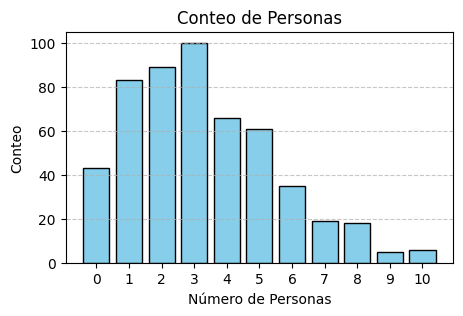

In [7]:
plot_df_counts_histogram(raw_df)

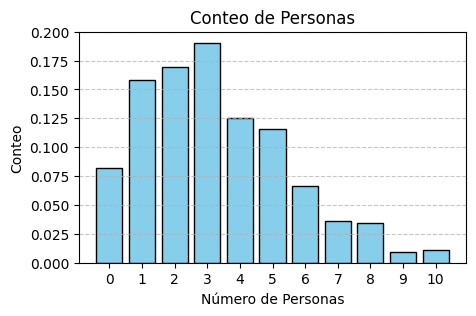

In [8]:
plot_df_counts_histogram(raw_df, normalize=True)

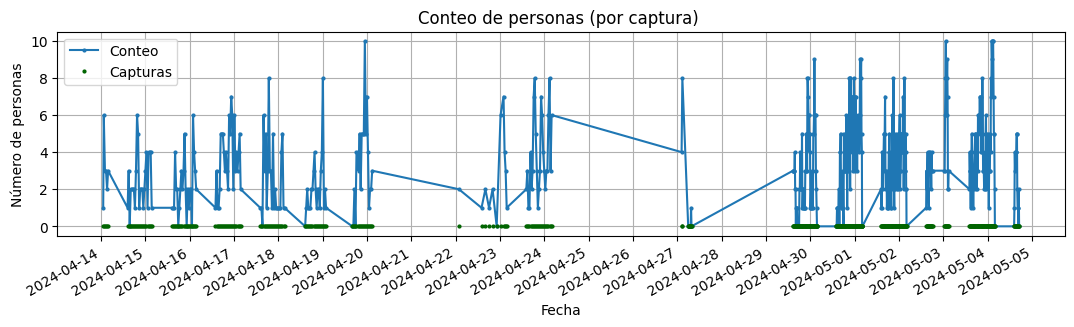

In [9]:
plot_df_counts_timeseries(raw_df)

# Agragaciones temporales

In [10]:
grupos_dic = {}
agrupaciones = ['2h', '4h', 'D', 'W']

for intervalo in agrupaciones:

    grupos_dic[intervalo] = raw_df.resample(intervalo).agg(
        mean=('people', 'mean'),
        sum=('people', 'sum')
    )

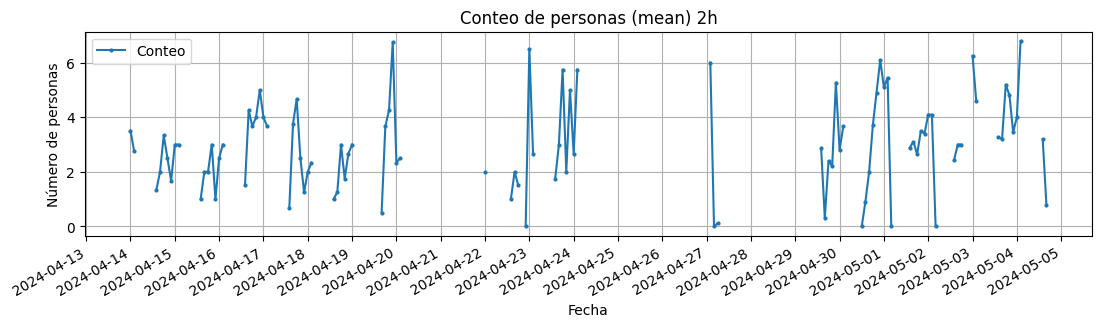

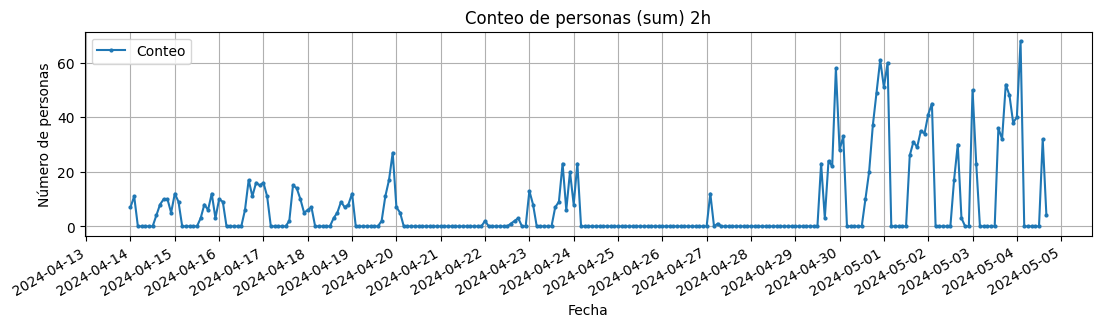

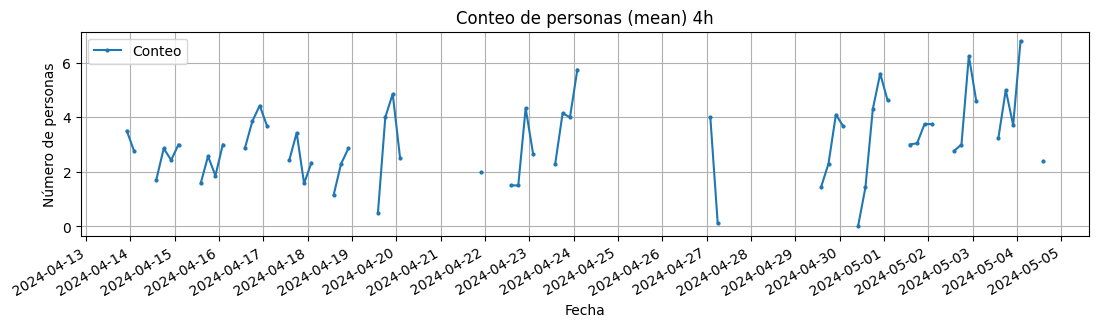

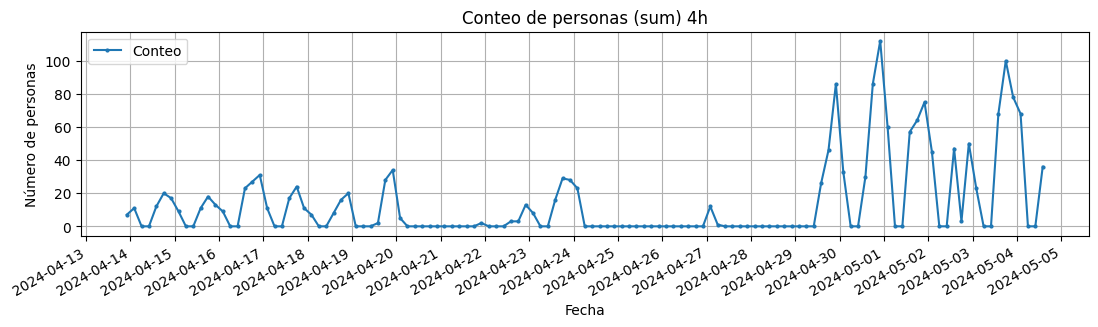

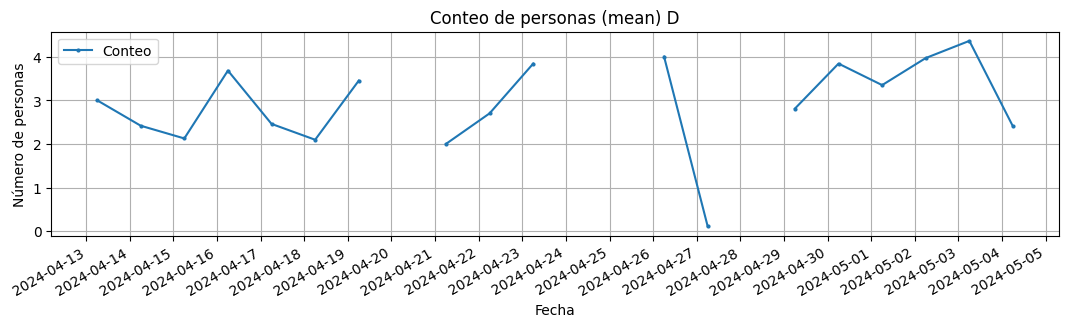

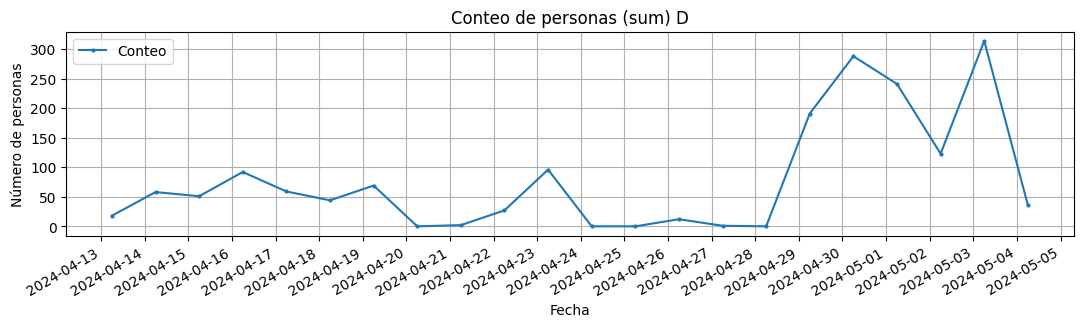

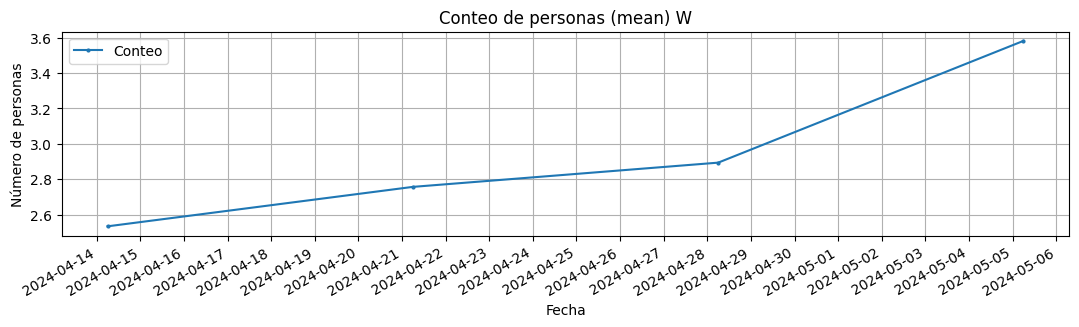

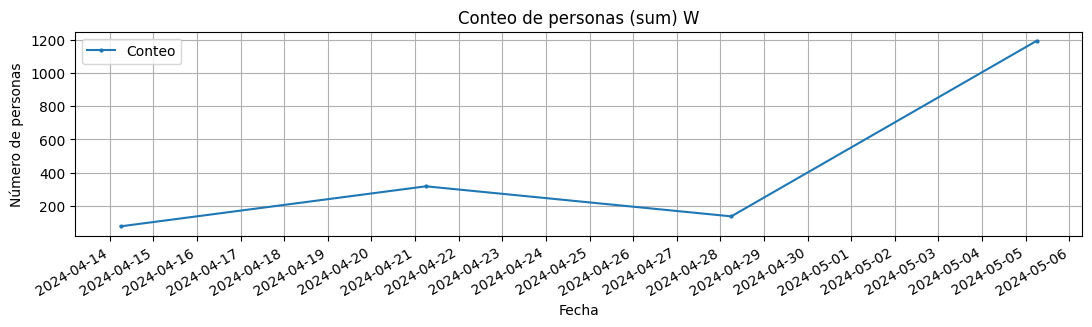

In [11]:
for intervalo in agrupaciones:
    for agg in ['mean','sum']:
        plot_df_counts_timeseries(grupos_dic[intervalo], grouped=True, agg2plot=agg, intervalo=intervalo)

In [12]:
conteo_por_dia = pd.DataFrame(grupos_dic['D']['sum'].value_counts()).reset_index()

# Definimos los rangos
bins = [0, 50, 100, 150, 200, 250, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 'Mayor a 250']

# Creamos una nueva columna 'range' que indica el rango al que pertenece cada 'sum'
conteo_por_dia['range'] = pd.cut(conteo_por_dia['sum'], bins=bins, labels=labels, right=False)

# Agrupamos por la nueva columna 'range' y sumamos los 'count'
conteo_diario_por_rango = conteo_por_dia.groupby('range', observed=False)['count'].sum().reset_index()

conteo_diario_por_rango

,range,count
0,0-50,11
1,51-100,6
2,101-150,1
3,151-200,1
4,201-250,1
5,Mayor a 250,2


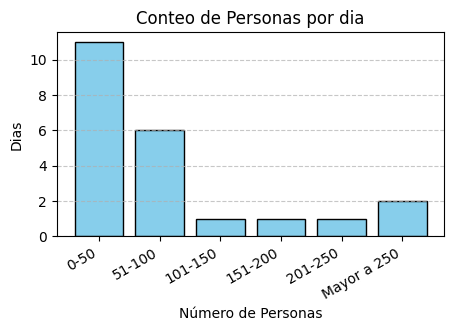

In [13]:
# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
plt.bar(conteo_diario_por_rango['range'], conteo_diario_por_rango['count'], color='skyblue', edgecolor='black', align='center')

# Añadir títulos y etiquetas
plt.title('Conteo de Personas por dia')
plt.xlabel('Número de Personas')
plt.ylabel('Dias')
plt.xticks(range(len(conteo_diario_por_rango)))  # Asegura que el eje x tenga marcas de 0 a 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

Puesto que nuestro objetivo principal es analizar la recurrencia diaria de clientes, también podemos agrupar por rangos y contar los días en cada rango. 

Este método puede ser de utilidad para buscar otros comportamientos en el dato.

# Ejemplos de imagenes capturadas

In [14]:
import glob
import random
import tensorflow_hub as hub

from librerias_integrador.detector.contar_objetos import detect_persons
from librerias_integrador.detector.plotear_img import plot_images_in_grid

In [15]:
objt_detector = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1")

## Seleccion de imagenes a desplegar

In [16]:
imgs_path = '../../../data/raw/imgs/selected_images'

filenames_list = glob.glob(imgs_path + "\/*.jpg")

subset = 12
random_sample = sorted(list(random.sample(filenames_list, subset)))

In [ ]:
images_labeled, boxes_per_image = detect_persons(random_sample, objt_detector, plot=False)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

In [ ]:
plot_images_in_grid(images_labeled, columns=4, size=(15,3))

# Ingenieria de caracteristicas

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
grupos_dic['D']['timestamp'] = pd.to_datetime(grupos_dic['D'].index)
grupos_dic['D']['trend'] = np.arange(len(grupos_dic['D']))

# Ajustar un modelo de regresión lineal para la tendencia
X = grupos_dic['D'][['trend']]  # Característica de tendencia
y = grupos_dic['D']['sum']  # Variable objetivo
model = LinearRegression()
model.fit(X, y)

# Crear características de tendencia
grupos_dic['D']['trend_feature'] = model.predict(X)

In [ ]:
def create_date_time_features(df, timestamp_col):
    """
    Esta función toma un DataFrame y el nombre de una columna de timestamp,
    y enriquece el DataFrame con nuevas columnas que representan características
    temporales derivadas del timestamp.

    Parámetros:
    - df (pandas.DataFrame): El DataFrame que contiene la columna de timestamp.
    - timestamp_col (str): El nombre de la columna de timestamp en el DataFrame.

    Retorna:
    - df (pandas.DataFrame): El DataFrame original con las nuevas columnas de características temporales añadidas.

    Las nuevas columnas añadidas son:
    - 'year': El año extraído del timestamp.
    - 'month': El mes extraído del timestamp.
    - 'day': El día extraído del timestamp.
    - 'weekday': El día de la semana extraído del timestamp (Lunes=0, Domingo=6).
    - 'is_weekend': Un indicador binario (0 o 1) que es 1 si el día es fin de semana (sábado o domingo) y 0 en caso contrario.
    """
    # Convertir la columna de timestamp a datetime
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    
    # Extraer características de fecha y hora
    df['year'] = df[timestamp_col].dt.year
    df['month'] = df[timestamp_col].dt.month
    df['day'] = df[timestamp_col].dt.day
    df['weekday'] = df[timestamp_col].dt.weekday
    df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
    
    return df

In [ ]:
create_date_time_features(grupos_dic['D'], 'timestamp')[['sum','trend','trend_feature','year','month','day','weekday','is_weekend']]